<pre style="font-size: 20px;">                                 <b>ASSIGNMENT NO. 01</b></pre>
</br>
<b>Title: Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.</b>
</br>

</br>

***Step 1: Load the dataset***

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('BostonHousing.csv') 

In [3]:
print(df.head()) 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  
0   4.98  24.0          0  
1   9.14  21.6          0  
2   4.03  34.7          1  
3   2.94  33.4          1  
4   5.33  36.2          1  


***Step 2: Preprocess the data***

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
X = df.drop('MEDV', axis=1) 
Y = df['MEDV']

In [6]:
scaler = StandardScaler() 
X= scaler.fit_transform(X) 

In [7]:
print(X[:5]) 

[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038 -1.0755623
  -0.44615259]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415 -0.49243937
  -0.44615259]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415 -1.2087274
   2.24138563]
 [-0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321  -1.36151682
   2.24138563]
 [-0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321  -1.02650148
   2.24138563]]


***Step 3: Split the dataset***

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

In [10]:
print('Training set shape:', X_train.shape, y_train.shape) 

Training set shape: (354, 13) (354,)


In [11]:
print('Testing set shape:', X_test.shape, y_test.shape) 

Testing set shape: (152, 13) (152,)


***Step 4: Define the model architecture***

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [16]:
model = Sequential() 
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(1))

In [17]:
print(model.summary()) 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None


***Step 5: Compile the model***

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error']) 

***Step 6: Train the model***

In [22]:
from keras.callbacks import EarlyStopping 
# Train the model 
early_stopping = EarlyStopping(monitor='val_loss', patience=5) 
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32,callbacks=[early_stopping]) 

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.0887 - mean_absolute_error: 2.8765 - val_loss: 11.5977 - val_mean_absolute_error: 2.5982
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.4323 - mean_absolute_error: 2.9299 - val_loss: 11.3650 - val_mean_absolute_error: 2.5842
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.3289 - mean_absolute_error: 2.5690 - val_loss: 11.5120 - val_mean_absolute_error: 2.6167
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.8245 - mean_absolute_error: 2.6055 - val_loss: 11.4373 - val_mean_absolute_error: 2.6124
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.4822 - mean_absolute_error: 2.5959 - val_loss: 11.6219 - val_mean_absolute_error: 2.6216
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17.3752 - mean_absolute_error: 3.1861 - val_loss: 11.8253 - val_mean_absolute_error: 2.6223
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13.2595 - mean_absolute_error: 2.7964 - val_loss:

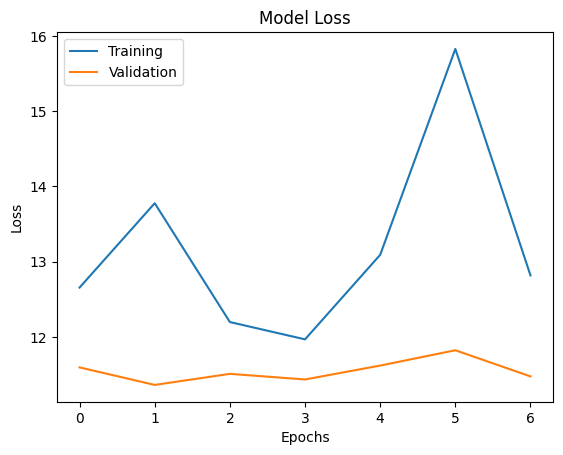

In [25]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training', 'Validation']) 
plt.show() 

***Step 7: Evaluate the model***

In [28]:
loss, mae = model.evaluate(X_test, y_test) 
print('\nMean Absolute Error:', mae ,"\nMean Squared Error: ",loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.4873 - mean_absolute_error: 2.3211

Mean Absolute Error: 2.3746607303619385 
Mean Squared Error:  11.303260803222656
